In [1]:
import numpy as np
from time import time
import os
import sys
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd
import psutil
from tqdm import tqdm
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import bigbadbrain as bbb
from scipy.linalg import toeplitz
import scipy.linalg as sl
from scipy.signal import convolve2d
from scipy.signal import convolve
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
%matplotlib inline

In [15]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_29/func_0'
#timestamps = bbb.load_timestamps(os.path.join(directory, 'imaging'))
#fictrac = bbb.load_fictrac(os.path.join(directory, 'fictrac'))
brain_path = os.path.join(directory, 'brain_zscored_green.nii')
brain = bbb.load_numpy_brain(brain_path)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 20.58 sec


In [16]:
dims = bbb.get_dims(brain)
resolution = 100 #desired resolution in ms
expt_len = 1000*30*60
fps = 50 #of fictrac camera
beta_len = 11

In [ ]:
fic = bbb.interpolate_fictrac(fictrac,timestamps,fps,expt_len,behavior='speed_all_3',sigma=3,sign=None)

In [28]:
X = brain[:,:,25,:].reshape(-1,brain.shape[-1])

In [29]:
t0 = time()
pca = PCA(n_components=10).fit(X.T)
print(time()-t0)

4.153245449066162


In [30]:
out = np.reshape(pca.components_, (10,dims['y'],dims['x']))

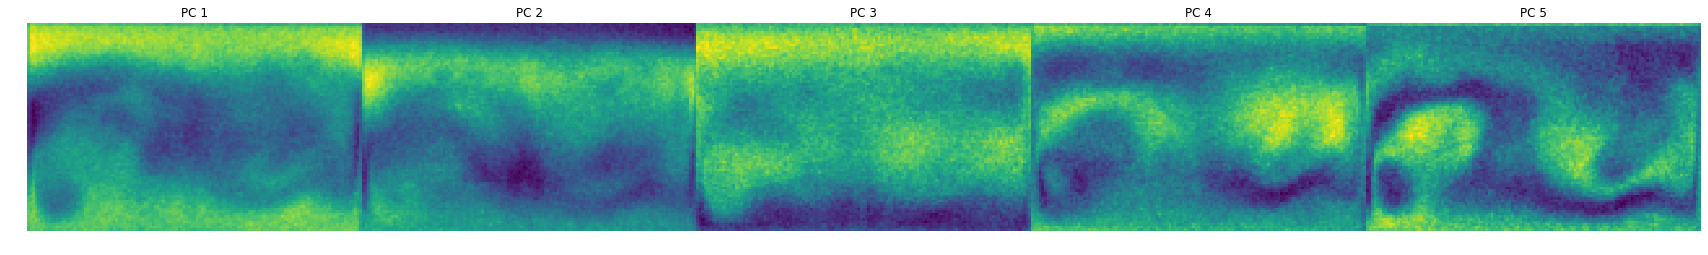

In [31]:
plt.figure(figsize=(30,20))
for i in np.arange(0,5):
    plt.subplot(1,5,i+1)
    plt.axis('off')
    plt.title('PC {}'.format(i+1))
    plt.imshow(out[i,:,:].T)
    plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

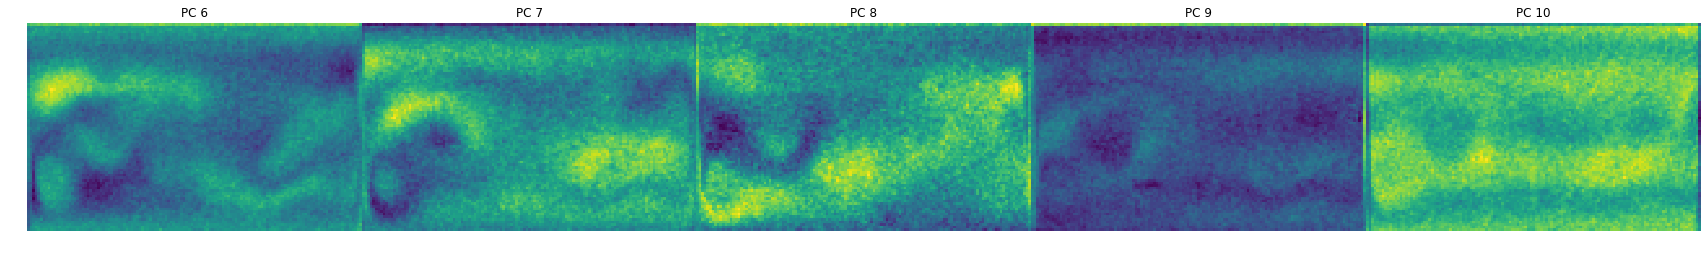

In [32]:
plt.figure(figsize=(30,20))
for i in np.arange(5,10):
    plt.subplot(1,5,i-4)
    plt.axis('off')
    plt.title('PC {}'.format(i+1))
    plt.imshow(out[i,:,:].T)
    plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

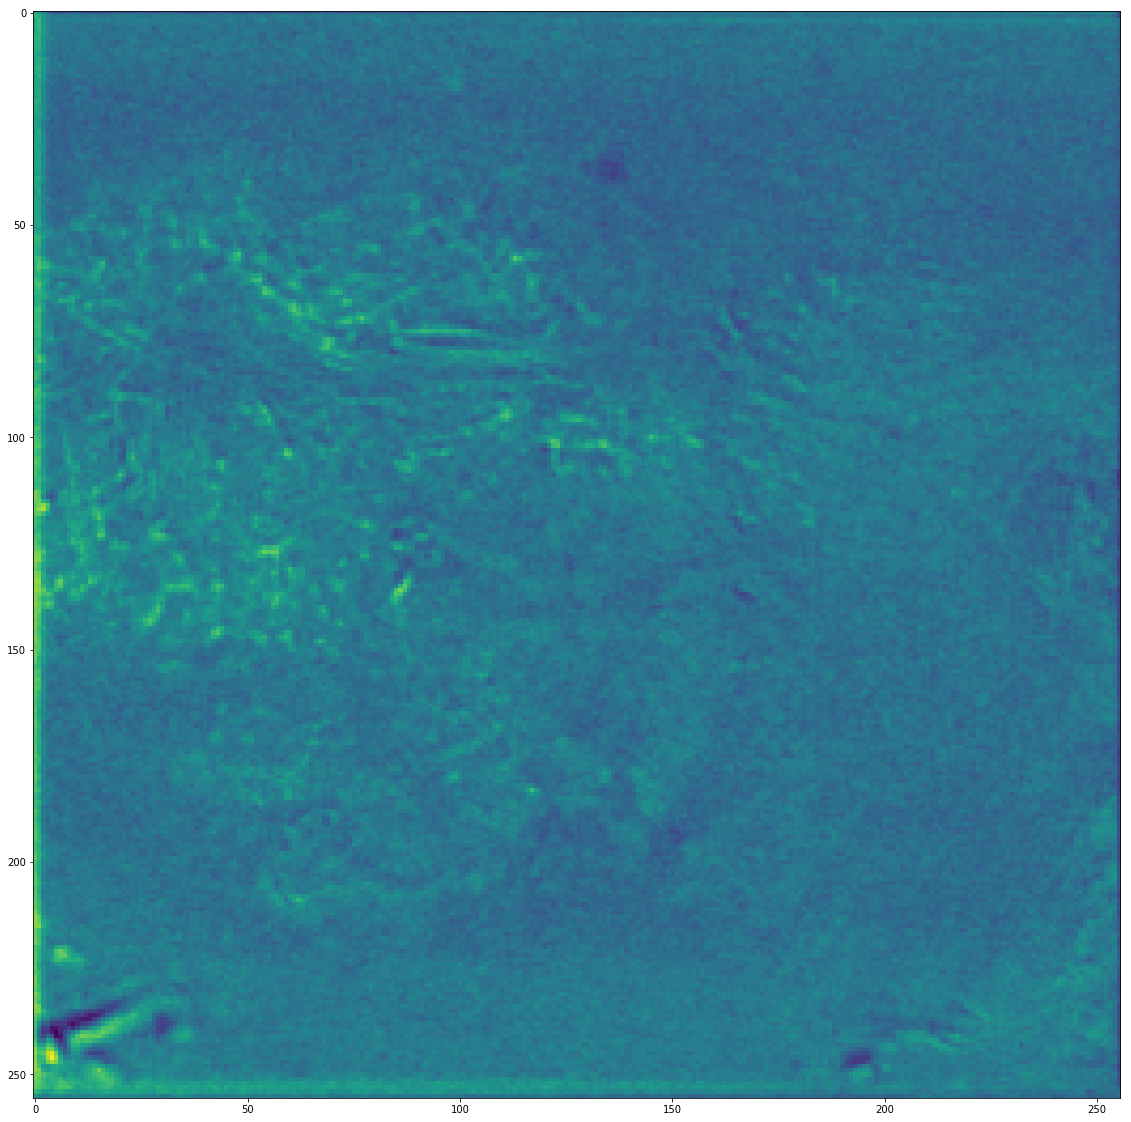

In [11]:
plt.figure(figsize=(20,20))
plt.imshow(out[6,:,:].T)